<a href="https://colab.research.google.com/github/Aligreu/Deep-Learning-with-Tensorflow-Projects/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.utils import load_img

In [2]:
!pip install opendatasets -q

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aligreualihassan","key":"0ec02ee8ed393df62e866a59100b8b1e"}'}

In [4]:
import opendatasets

opendatasets.download("https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database?select=COVID-19_Radiography_Dataset")

100%|██████████| 778M/778M [00:40<00:00, 20.2MB/s]


## READ IMAGES

In [5]:
import os

base_folder = './data/'
folders = "/content/covid19-radiography-database/COVID-19_Radiography_Dataset"

dirs = os.listdir(folders)

In [7]:
folds = [d for d in dirs if not d.endswith('.xlsx') | d.endswith('.txt')]
folds

['Normal', 'COVID', 'Viral Pneumonia', 'Lung_Opacity']

In [8]:
paths = [os.path.join(folders, f, 'images') for f in folds]
paths

['/content/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/images',
 '/content/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/images',
 '/content/covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia/images',
 '/content/covid19-radiography-database/COVID-19_Radiography_Dataset/Lung_Opacity/images']

In [9]:
import shutil


for folder, name in zip(paths, folds):
    folder_name = os.path.basename(folder)
    new_folder = os.path.join(base_folder, name)
    shutil.copytree(folder, new_folder)

In [10]:
generator = ImageDataGenerator(rescale=1.0/255,
                              validation_split=0.2)

train_data = generator.flow_from_directory("/content/data",
                                          subset='training',
                                          target_size=(200,200),
                                          color_mode='grayscale')

validation_data = generator.flow_from_directory("/content/data",
                                               subset="validation",
                                               target_size=(200,200),
                                               color_mode='grayscale')

Found 16933 images belonging to 4 classes.
Found 4232 images belonging to 4 classes.


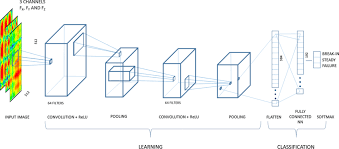

In [51]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu',padding='same', input_shape=(200,200,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(64, 3,padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(128, 3,padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.4)) # prevent overfitting

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))


model.add(keras.layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## best optimizer to optimize the model

### 1- Adam >> adaptive moment estimation
### 2 - SGD >> Stochastic Gradient Decent
### 3 - RMSProp >> Root Mean Square Propagation

# Loss >> Error Function

### Categorical Crossentropy >> multiclass classification
### Binary Crossentropy >> Binary classification

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 200, 200, 32)      320       
                                                                 
 batch_normalization_6 (Batc  (None, 200, 200, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 batch_normalization_7 (Batc  (None, 100, 100, 64)     256       
 hNormalization)                                                 
                                                      

In [38]:
model.fit(train_data,
          epochs=10,
          validation_data=validation_data,
          batch_size=32)

Epoch 1/10
530/530 [==============================] - 56s 100ms/step - loss: 0.7956 - accuracy: 0.7275 - val_loss: 1.0473 - val_accuracy: 0.5577
Epoch 2/10
530/530 [==============================] - 53s 100ms/step - loss: 0.4291 - accuracy: 0.8364 - val_loss: 0.4448 - val_accuracy: 0.8284
Epoch 3/10
530/530 [==============================] - 52s 99ms/step - loss: 0.3430 - accuracy: 0.8703 - val_loss: 0.3775 - val_accuracy: 0.8578
Epoch 4/10
530/530 [==============================] - 52s 98ms/step - loss: 0.2878 - accuracy: 0.8903 - val_loss: 0.3993 - val_accuracy: 0.8528
Epoch 5/10
530/530 [==============================] - 51s 97ms/step - loss: 0.2437 - accuracy: 0.9075 - val_loss: 0.7253 - val_accuracy: 0.7694
Epoch 6/10
530/530 [==============================] - 53s 101ms/step - loss: 0.2110 - accuracy: 0.9194 - val_loss: 0.8660 - val_accuracy: 0.7762
Epoch 7/10
530/530 [==============================] - 52s 98ms/step - loss: 0.1822 - accuracy: 0.9318 - val_loss: 0.4215 - val_accura

In [39]:
model.evaluate(validation_data)

133/133 [==============================] - 10s 75ms/step - loss: 0.6001 - accuracy: 0.7909


[0.6001258492469788, 0.7908790111541748]

In [41]:
validation_data.class_indices

{'COVID': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Viral Pneumonia': 3}

In [43]:
predictions = model.predict(validation_data).argmax(axis=1)

133/133 [==============================] - 10s 73ms/step


In [52]:
validation_data.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [53]:
from sklearn.metrics import accuracy_score, f1_score

acc = accuracy_score(validation_data.classes, predictions)
f1score = f1_score(validation_data.classes, predictions, average='weighted')

print(f1score)

0.3397354503462044


# Model Evaluation

In [46]:
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score, ConfusionMatrixDisplay)

y_hat =  np.argmax(model.predict(validation_data), axis=1)

133/133 [==============================] - 10s 72ms/step


In [47]:
f1_score(y_hat, validation_data.classes, average='micro')

0.32041587901701324

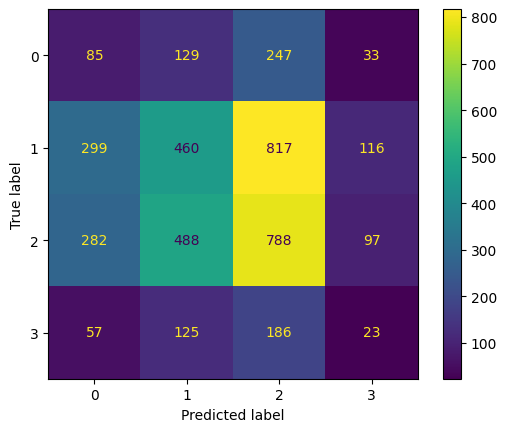

In [48]:
import seaborn as sns
ConfusionMatrixDisplay(confusion_matrix(y_hat, validation_data.classes)).plot()

In [50]:
model.save('hwaze_model.h5')